In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
mta = pd.read_csv('mta_clean.zip', parse_dates=['date', 'timestamp'], low_memory=False)
mta['total_div_six'] = mta['total']/6

In [4]:
def timeperiod(time):
    time = dt.datetime.strptime(time, '%H:%M:%S').time()
    if time >= dt.time(0,0,0) and time < dt.time(4,0,0):
        return "12am-4am"
    elif time >= dt.time(4,0,0) and time < dt.time(8,0,0):
        return "4am-8am"
    elif time >= dt.time(8,0,0) and time < dt.time(12,0,0):
        return "8am-12pm"
    elif time >= dt.time(12,0,0) and time < dt.time(16,0,0):
        return "12pm-4pm"    
    elif time >= dt.time(16,0,0) and time < dt.time(20,0,0):
        return "4pm-8pm"    
    else:
        return "8pm-12am"
    
mta['time_period'] = mta['time'].apply(timeperiod)  

In [36]:
mta.head()

,station,turnstile,ca,unit,scp,linename,num_lines,division,desc,date,time,timestamp,weekday,entries,exits,total,time_period
0,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03,04:00:00,2019-08-03 04:00:00,Saturday,0.0,10.0,10.0,4am-8am
1,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03,08:00:00,2019-08-03 08:00:00,Saturday,0.0,7.0,7.0,8am-12pm
2,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03,12:00:00,2019-08-03 12:00:00,Saturday,0.0,10.0,10.0,12pm-4pm
3,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03,16:00:00,2019-08-03 16:00:00,Saturday,0.0,12.0,12.0,4pm-8pm
4,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03,20:00:00,2019-08-03 20:00:00,Saturday,0.0,11.0,11.0,8pm-12am


Text(0.5, 1.0, 'Lexington Av / 53 St')

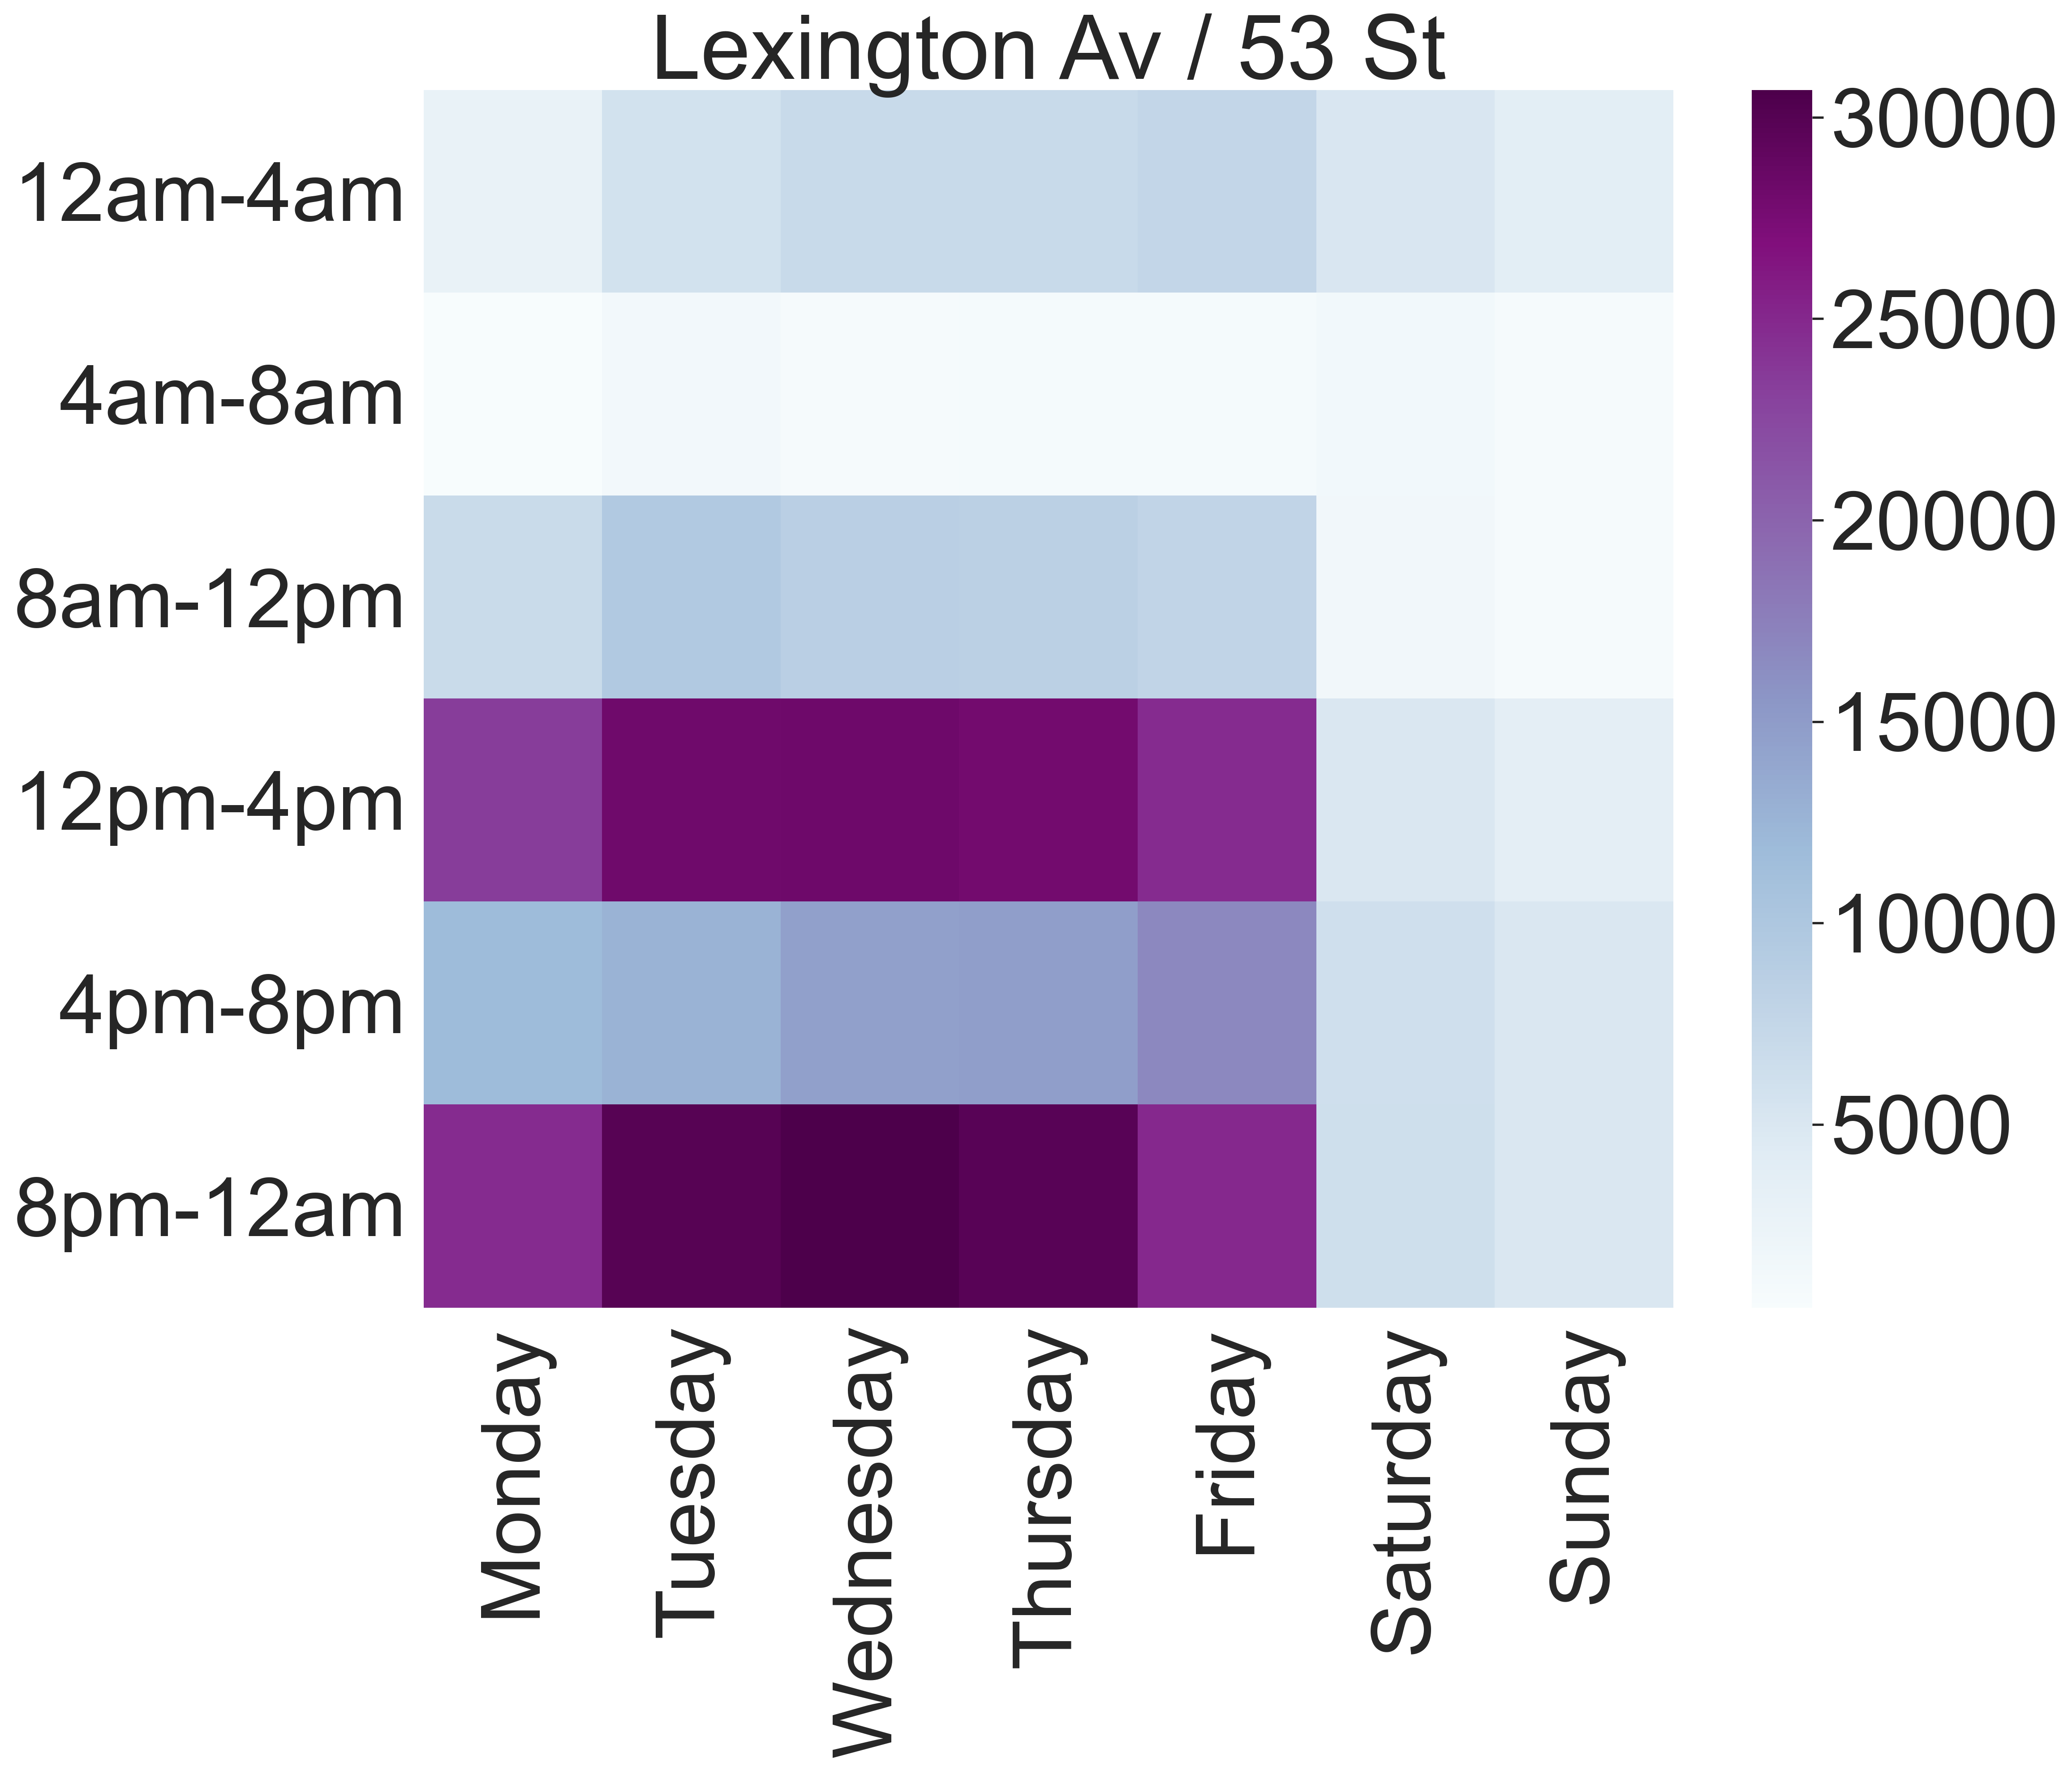

In [17]:
sns.set(font_scale = 4)

station_heatplot = mta[mta['station'] == 'LEXINGTON AV/53'].groupby(['time_period','weekday'])['total_div_six'].sum()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])

fig, ax = plt.subplots(1, 1, figsize = (15, 12), dpi=300)

sns.set_style("white")
sns.heatmap(station_heatplot,cmap='BuPu');

ax.set_ylabel('')    
ax.set_xlabel('')

plt.title('Lexington Av / 53 St')

In [115]:
mta.station.unique()

array(['1 AV', '103 ST-CORONA', '103 ST', '104 ST', '110 ST', '111 ST',
       '116 ST-COLUMBIA', '116 ST', '121 ST', '125 ST', '135 ST',
       '137 ST CITY COL', '138/GRAND CONC', '14 ST', '14 ST-UNION SQ',
       '145 ST', '149/GRAND CONC', '14TH STREET', '15 ST-PROSPECT',
       '155 ST', '157 ST', '161/YANKEE STAD', '163 ST-AMSTERDM', '167 ST',
       '168 ST', '169 ST', '170 ST', '174 ST', '174-175 STS', '175 ST',
       '176 ST', '18 AV', '18 ST', '181 ST', '182-183 STS', '183 ST',
       '190 ST', '191 ST', '2 AV', '20 AV', '207 ST', '21 ST',
       '21 ST-QNSBRIDGE', '215 ST', '219 ST', '225 ST', '23 ST', '231 ST',
       '233 ST', '238 ST', '25 AV', '25 ST', '28 ST', '3 AV 138 ST',
       '3 AV-149 ST', '3 AV', '30 AV', '33 ST', '33 ST-RAWSON ST',
       '34 ST-HERALD SQ', '34 ST-HUDSON YD', '34 ST-PENN STA', '36 AV',
       '36 ST', '39 AV', '4 AV-9 ST', '40 ST LOWERY ST',
       '42 ST-BRYANT PK', '42 ST-PORT AUTH', '45 ST', '46 ST BLISS ST',
       '46 ST', '47-50 STS ROCK